<a href="https://colab.research.google.com/github/bcandraas/Data-Analyst-Portfolio/blob/main/BERLIN_TEAM_J.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEAM J
- Dataset : Internet Service Provider Customer Churn
- Link: https://www.kaggle.com/datasets/mehmetsabrikunt/internet-service-churn

# Content
- Objective
- Data Overview
- Data Preparation
> Import Libraries,
> Import Dataset
- Data Cleaning
> Handling Missing Values (N/A),
> Remove Duplicates,
> Change Data Types and Rename Column,
> Handling Outliers
- Exploratory Data Analysis (EDA) 
> Visualization Exploratory Data Analysis (EDA),
> Descriptive Statistics,
> Correlation
- Data Modeling
> Feature Selection,
> Logistic Regression Modeling,
> K-Nearest Neighbors Modeling,
> Decision Tree Modeling,
> Support Vector Machine Modeling,
> Random Forest Modeling,
> Model Selection
- Data Manipulation 
> On Movie Package Subsriber,
> On Download Average,
> On Movie Package Subcriber and Download Average,
> On Download Average and Upload Average,
> On Remaining Contract

# Objective

There is a big competition between Internet providers. If a providers want to increase its revenue they needs more subscriber but keep existing customer is more important than having new ones. So providers want to know which customer should cancel the service (we call this as churn). If they know who will go, maybe they can catch them with promotions.

As Data Analyst, we can conclude that the problem is: "How to decrease churn rate  from 55% to 45% within 6 months" in order to do so, we will also identify the profile of customers that are likely to churn with available features.

One of the solution on this is creating customer churn model so that we can give accurate engagement message to the customer.

# Data Overview

The dataset consist of the following features: 
1. **id**: unique subscriber id
2.   **is_tv_subscriber customer**: Does customer have TV subcription or not
3.   **is_movie_package_subscriber?**: Does customer have movie subcription or not
4. **subscription_age**: How many year has the customer use the service
5. **bill_avg**: Last 3 months bill average
6. **reamining_contract**: How many year remaining for customer contract. If null; customer didn't have a contract. The customer who has a contract time have to use their service until contract end. If they canceled their service before contract time end they pay a penalty fare.
Two ways in which a customer could be using the services. One through a time-bound contract which costs less and another through a normal monthly subscription which obviously costs more. So, even if a person is not in a contract, he's still a user who's paying monthly fees.
7. **service_failure_count customer**: Call count to call center for service failure for last 3 months
8. **download_avg**: Last 3 months internet usage (GB)

9. **upload_avg**: Last 3 months upload avg (GB)

10. **download_over_limit**: Most of customer has a download limit. if they reach this limit they have to pay for this. this column contain "limit over count" for last 9 months

11. **churn**: this is the target column. if 1 customer canceled his service

The dataset is Internet Service Provider Customer Churn.

Taken from https://www.kaggle.com/mehmetsabrikunt/internet-service-churn/metadata

Consist of 72275 rows and 11 columns.

# Data Preparation

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from sklearn import cluster
from google.colab import files

#Preprocessing
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Modeling
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#Evaluate model Performance
from sklearn.metrics import classification_report, confusion_matrix , precision_score, recall_score, accuracy_score

##Import Dataset


In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1wLHKYKLsF1l0oWfcnT1Lnvo3XYfBJDgp_dTRu3a-uyE/edit#gid=937989658'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/1wLHKYKLsF1l0oWfcnT1Lnvo3XYfBJDgp_dTRu3a-uyE/export?format=csv&gid=937989658


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [ ]:
len(df)

72274

In [ ]:
new_df = df.copy()

# Data Cleaning

## Handling Missing Values (N/A)

In [ ]:
new_df.isna().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

It says in dataset for reamining_contract is how many year remaining for customer contract. **If null; customer hasn't have a contract.** The customer who has a contract time have to use their service until contract end. If they canceled their service before contract time end they pay a penalty fare.

In [ ]:
new_df['reamining_contract'] = new_df['reamining_contract'].fillna(0)
new_df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1


In [ ]:
new_df.isna().sum()

id                               0
is_tv_subscriber                 0
is_movie_package_subscriber      0
subscription_age                 0
bill_avg                         0
reamining_contract               0
service_failure_count            0
download_avg                   381
upload_avg                     381
download_over_limit              0
churn                            0
dtype: int64

In [ ]:
new_df[df.isnull().any(axis=1)]

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
1,18,0,0,8.22,0,0.0,0,0.0,0.0,0,1
3,27,0,0,6.87,21,0.0,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.0,0,0.0,0.0,0,1
7,84,0,0,5.48,14,0.0,1,0.0,0.0,0,1
8,94,0,0,8.54,0,0.0,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72249,1689246,1,0,0.10,16,0.0,0,11.4,0.9,0,1
72259,1689452,0,0,0.07,25,0.0,0,70.7,6.6,0,1
72263,1689530,1,0,0.02,0,0.0,0,0.0,0.0,0,1
72264,1689533,0,0,0.01,0,0.0,0,0.0,0.0,0,1


In [ ]:
new_df.dropna(axis=0,inplace=True)
print(new_df.shape)
new_df.head()

(71893, 11)


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1


In [ ]:
new_df.isna().sum()

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

In [ ]:
len(new_df)

71893

## Remove Duplicates

In [ ]:
new_df.duplicated().sum()

0

## Change Data Types and Rename Column

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           71893 non-null  int64  
 1   is_tv_subscriber             71893 non-null  int64  
 2   is_movie_package_subscriber  71893 non-null  int64  
 3   subscription_age             71893 non-null  float64
 4   bill_avg                     71893 non-null  int64  
 5   reamining_contract           71893 non-null  float64
 6   service_failure_count        71893 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          71893 non-null  int64  
 10  churn                        71893 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.6 MB


In [ ]:
new_df.rename(columns = {'reamining_contract':'remaining_contract'}, inplace = True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           71893 non-null  int64  
 1   is_tv_subscriber             71893 non-null  int64  
 2   is_movie_package_subscriber  71893 non-null  int64  
 3   subscription_age             71893 non-null  float64
 4   bill_avg                     71893 non-null  int64  
 5   remaining_contract           71893 non-null  float64
 6   service_failure_count        71893 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          71893 non-null  int64  
 10  churn                        71893 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.6 MB


## Handling Outliers

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           71893 non-null  int64  
 1   is_tv_subscriber             71893 non-null  int64  
 2   is_movie_package_subscriber  71893 non-null  int64  
 3   subscription_age             71893 non-null  float64
 4   bill_avg                     71893 non-null  int64  
 5   remaining_contract           71893 non-null  float64
 6   service_failure_count        71893 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          71893 non-null  int64  
 10  churn                        71893 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.6 MB


In [ ]:
q1 = new_df['bill_avg'].quantile(.25)
q3 = new_df['bill_avg'].quantile(.75)
iqr = q3-q1

UIF = q3 + (1.5*iqr)
LIF = q1 - (1.5*iqr)

print('iqr',iqr)
print('UIF',UIF)
print('LIF',LIF)

iqr 9.0
UIF 35.5
LIF -0.5


In [ ]:
new_df_clean = new_df[(new_df['bill_avg']<=UIF) & (new_df['bill_avg']>=LIF)]
new_df_clean

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [ ]:
len(new_df_clean)

68532

In [ ]:
q1 = new_df_clean['download_avg'].quantile(.25)
q3 = new_df_clean['download_avg'].quantile(.75)
iqr = q3-q1

UIF = q3 + (1.5*iqr)
LIF = q1 - (1.5*iqr)

print('iqr',iqr)
print('UIF',UIF)
print('LIF',LIF)

iqr 51.300000000000004
UIF 134.55
LIF -70.65


In [ ]:
new_df_clean = new_df_clean[(new_df_clean['download_avg']<=UIF) & (new_df_clean['download_avg']>=LIF)]
new_df_clean

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [ ]:
len(new_df_clean)

65593

In [ ]:
q1 = new_df_clean['upload_avg'].quantile(.25)
q3 = new_df_clean['upload_avg'].quantile(.75)
iqr = q3-q1

UIF = q3 + (1.5*iqr)
LIF = q1 - (1.5*iqr)

print('iqr',iqr)
print('UIF',UIF)
print('LIF',LIF)

iqr 3.8000000000000003
UIF 9.9
LIF -5.3


In [ ]:
new_df_clean = new_df_clean[(new_df_clean['upload_avg']<=UIF) & (new_df_clean['upload_avg']>=LIF)]
new_df_clean

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [ ]:
new_df_clean['subscription_age'].min()

-0.02

In [ ]:
new_df_clean = new_df_clean[new_df_clean.subscription_age != -0.02]
new_df_clean

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [ ]:
new_df_clean.shape

(62495, 11)

# Exploratory Data Analysis (EDA)

## Visualization Exploratory Data Analysis (EDA)

In [ ]:
new_df_clean.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1


In [ ]:
df = new_df_clean.copy()

In [ ]:
df_churn = df['churn'].value_counts().reset_index()
df_churn

,index,churn
0,1,36256
1,0,26239


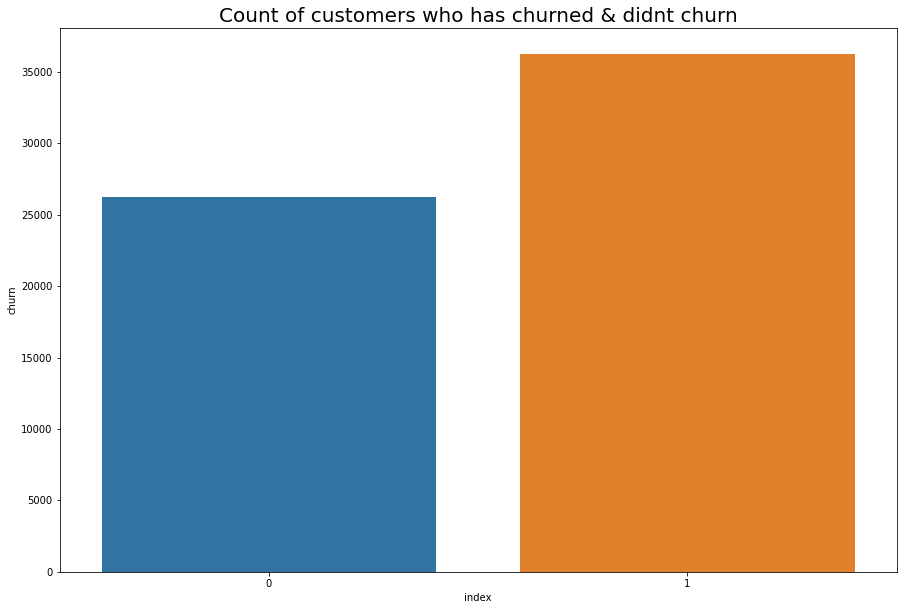

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Count of customers who has churned & didnt churn', fontsize = 20)
sns.barplot(data=df_churn,x='index',y='churn',ax=ax)
plt.show()

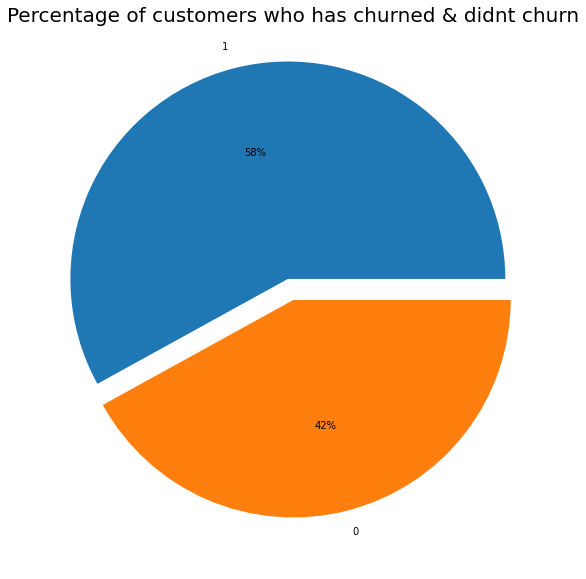

In [ ]:
plt.figure(figsize = (15,10))
#declaring exploding pie
explode = [0.1, 0]

plt.title('Percentage of customers who has churned & didnt churn', fontsize = 20)

#plotting data on chart
plt.pie(df_churn['churn'], labels=df_churn['index'],
        explode=explode, autopct='%.0f%%')
  
#displaying chart
plt.show()

Summary
*   Terdapat 58 % user dengan total 36257 user yang churn
*   Terdapat 42 % user dengan total 26239 user yang tidak churn



In [ ]:
df_subs = df[['is_tv_subscriber','is_movie_package_subscriber']].agg('sum').reset_index()
df_subs = df_subs.rename(columns = {'index':'subs_type',0:'total_users'})
df_subs

,subs_type,total_users
0,is_tv_subscriber,50789
1,is_movie_package_subscriber,19859


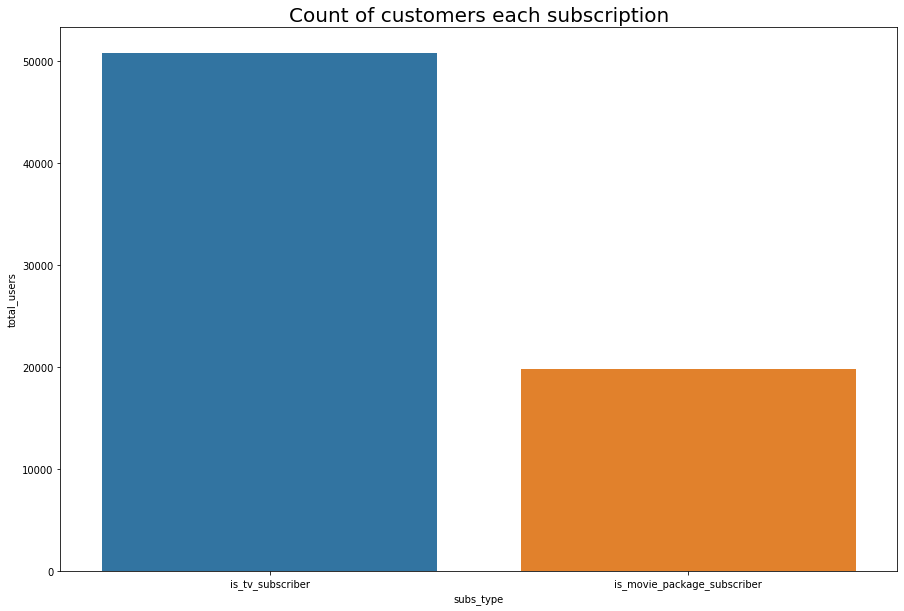

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Count of customers each subscription', fontsize = 20)
sns.barplot(data=df_subs,x='subs_type',y='total_users',ax=ax)
plt.show()

In [ ]:
df_subs_compare = df.groupby(['is_tv_subscriber','is_movie_package_subscriber']).agg(
    {'is_movie_package_subscriber':'count', 'churn':'sum'}
    ).rename(
        columns={'is_movie_package_subscriber':'total_movie_package_subscriber'}
        ).reset_index()
df_subs_compare

,is_tv_subscriber,is_movie_package_subscriber,total_movie_package_subscriber,churn
0,0,0,11704,10774
1,0,1,2,2
2,1,0,30932,18260
3,1,1,19857,7220


Summary
*   Terdapat hanya ada 2 users yang mengambil subscription movie package
*   Terdapat 11705 users yang tidak mengambil subscription apapun
*   Terdapat 19857 users yang mengambil semua subscription






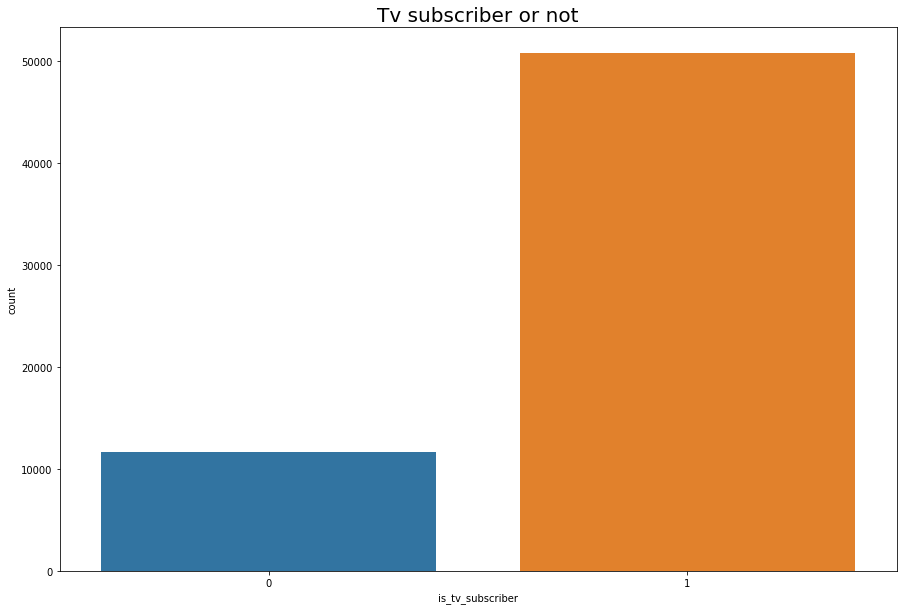

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Tv subscriber or not', fontsize = 20)
ax = sns.countplot(x = 'is_tv_subscriber' ,  data = df,ax=ax)
plt.show()

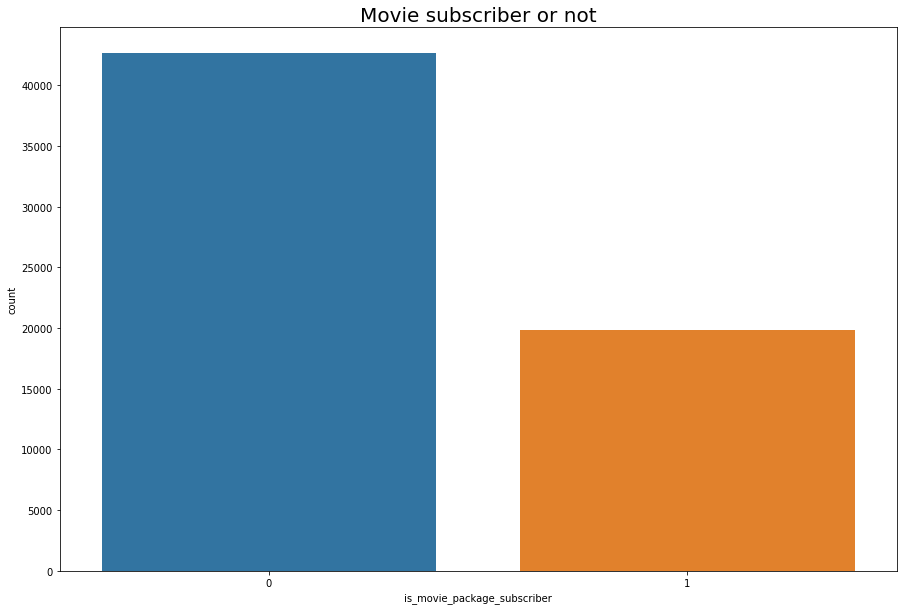

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Movie subscriber or not', fontsize = 20)
ax = sns.countplot(x = 'is_movie_package_subscriber' ,  data = df,ax=ax)
plt.show()

In [ ]:
df_subs_compare = df.groupby(['is_tv_subscriber'])['churn'].agg('sum').reset_index()
df_subs_compare = df_subs_compare.rename(columns = {'churn':'total_churn'})
df_subs_compare

,is_tv_subscriber,total_churn
0,0,10776
1,1,25480


In [ ]:
df_subs_compare2 = df.groupby(['is_movie_package_subscriber'])['churn'].agg('sum').reset_index()
df_subs_compare2 = df_subs_compare2.rename(columns = {'churn':'total_churn'})
df_subs_compare2

,is_movie_package_subscriber,total_churn
0,0,29034
1,1,7222


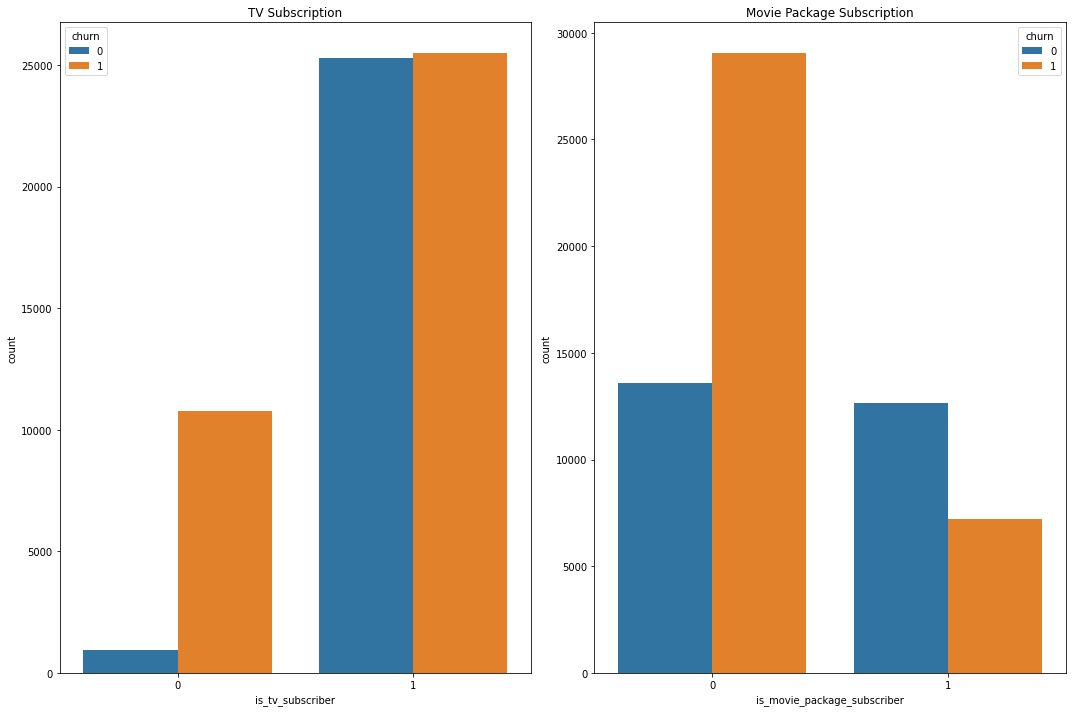

In [ ]:
# creating subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Tv subscription or not
sns.countplot(data = df, x = 'is_tv_subscriber', hue = 'churn', ax=axes[0])
axes[0].set_title("TV Subscription")

# Movie package subscription or not
sns.countplot(data = df, x = 'is_movie_package_subscriber', hue = 'churn', ax=axes[1])
axes[1].set_title('Movie Package Subscription')
fig.tight_layout()

Summary
*   Dapat dilihat bahwa user yang mengambil subscription tv lebih banyak churn dengan total 18260
*   Dan user yang mengambil semua subscription paling sedikit churn dengan total 7220



In [ ]:
df_avg_bill = df.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])['bill_avg','churn'].agg('sum').reset_index()
df_avg_bill = df_avg_bill.rename(columns = {'bill_avg':'total_bill_avg','churn':'total_churn'})
df_avg_bill

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,is_tv_subscriber,is_movie_package_subscriber,total_bill_avg,total_churn
0,0,0,195239,10774
1,0,1,28,2
2,1,0,532567,18260
3,1,1,332825,7220


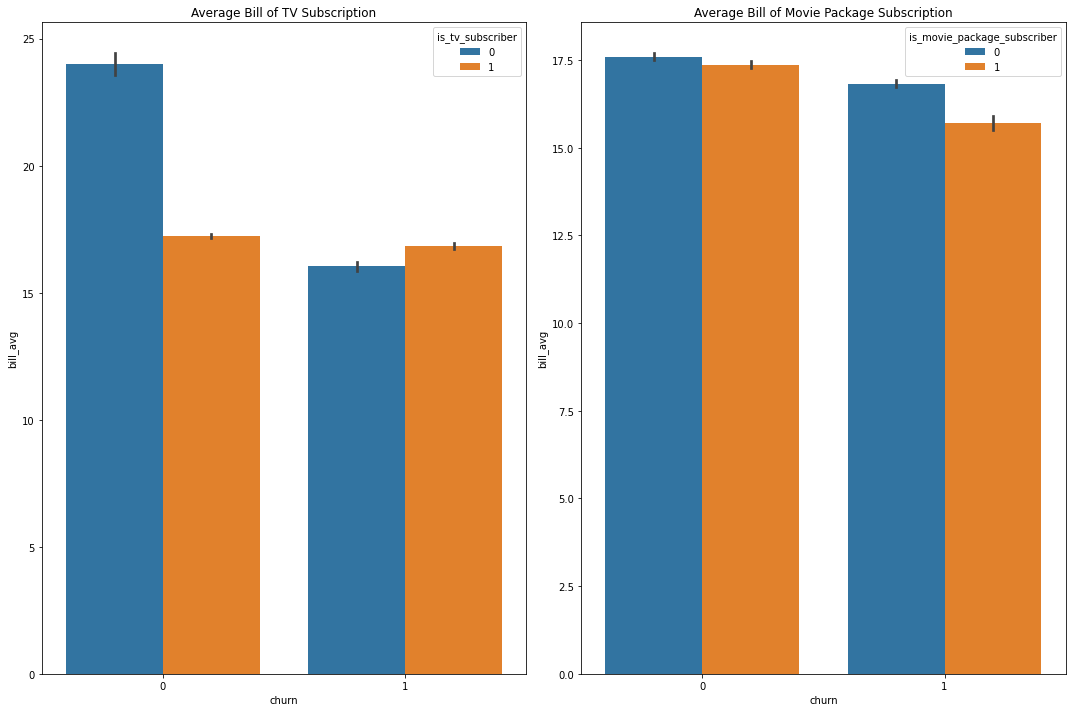

In [ ]:
# creating subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Tv subscription or not
sns.barplot(data = df, x = 'churn', y = 'bill_avg', hue = 'is_tv_subscriber', ax=axes[0])
axes[0].set_title("Average Bill of TV Subscription")

# Movie package subscription or not
sns.barplot(data = df, x = 'churn', y = 'bill_avg', hue = 'is_movie_package_subscriber', ax=axes[1])
axes[1].set_title('Average Bill of Movie Package Subscription')
fig.tight_layout()

Summary
*   Dapat dilihat bahwa users dengan subscription tv memiliki total avg bill paling banyak dan churn rate yang paling tinggi




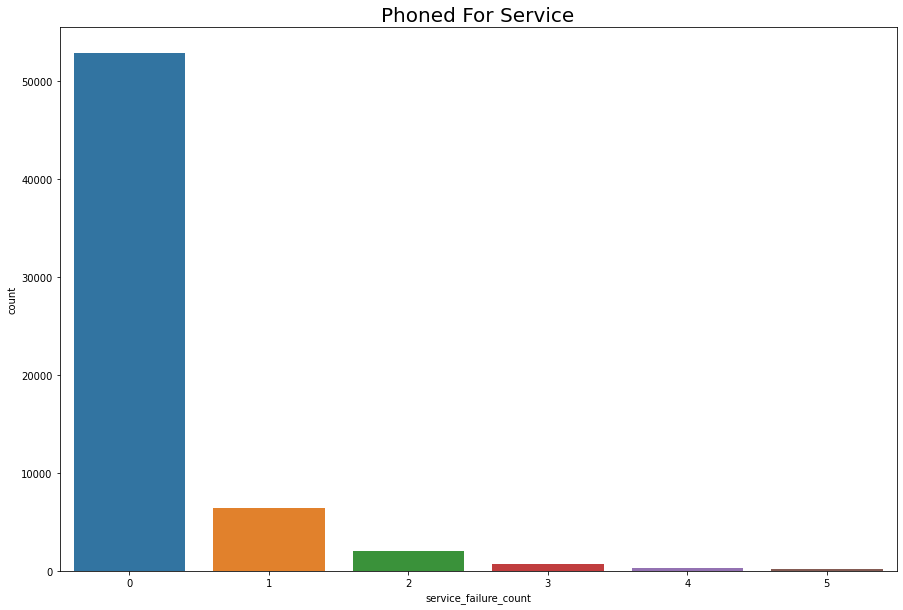

In [ ]:
data = df[df['service_failure_count'] < 6]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Phoned For Service', fontsize = 20)
ax = sns.countplot(x = 'service_failure_count' ,  data = data)
plt.show()

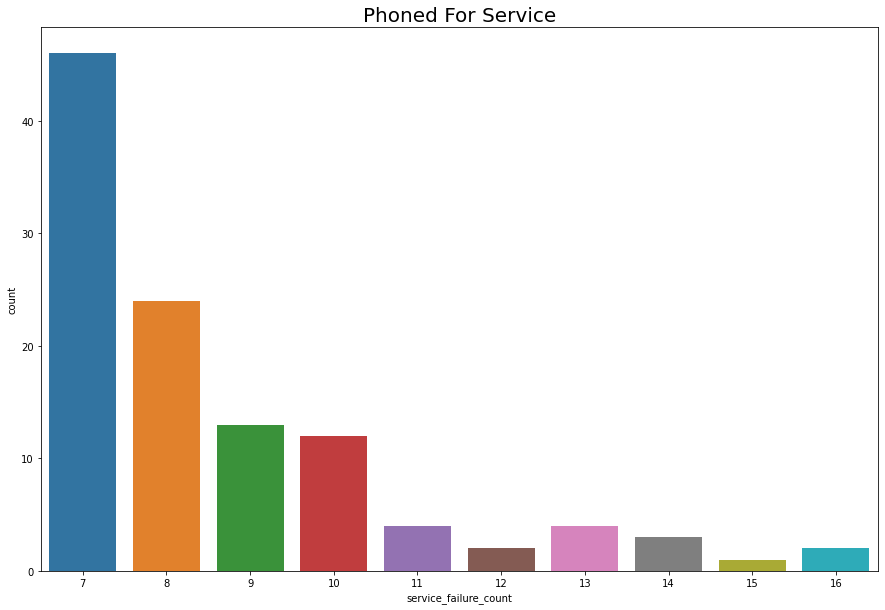

In [ ]:
data = df[df['service_failure_count'] > 6]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Phoned For Service', fontsize = 20)
ax = sns.countplot(x = 'service_failure_count' ,  data = data)
plt.show()

Summary
*   Dapat dilihat user dengan service fail 7 paling banyak menghubungi call center



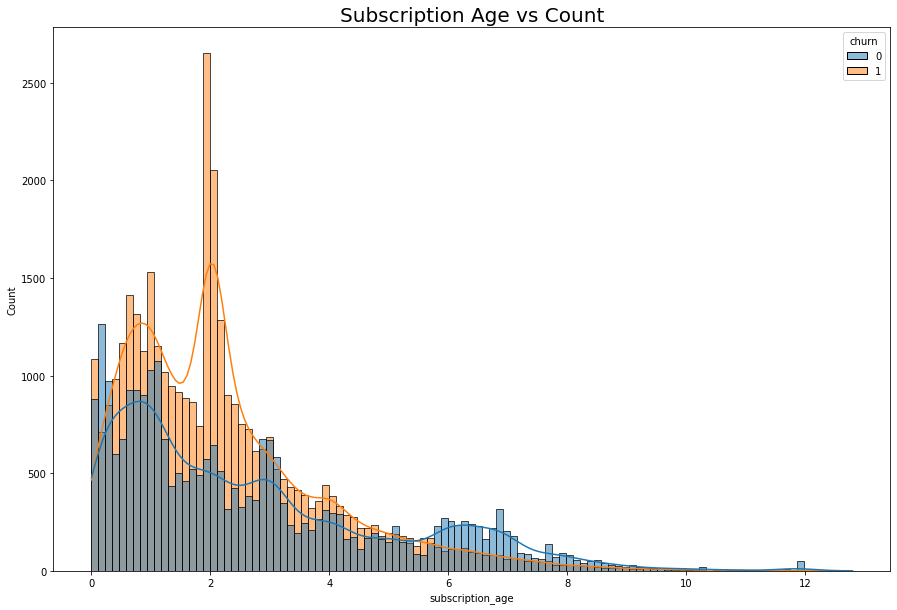

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Subscription Age vs Count', fontsize = 20)
ax = sns.histplot(data = df, x= 'subscription_age', kde = True, hue = 'churn')
plt.show()

Summary
*   Dapat dilihat users dengan subcription 1 sampai 3 tahun memiliki churn rate yang tinggi



In [ ]:
df_down_up_avg = df.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])['download_avg','upload_avg','churn'].agg('sum').reset_index()
df_down_up_avg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,is_tv_subscriber,is_movie_package_subscriber,download_avg,upload_avg,churn
0,0,0,163890.0,13406.4,10774
1,0,1,83.2,5.7,2
2,1,0,972540.0,74966.9,18260
3,1,1,804493.4,60080.2,7220


Summary
*   Dapat dilihat users yang mengambil tv subs dan kedua subs memiliki penggunaan data tertinggi




In [ ]:
df_contract = df.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])['remaining_contract','churn'].agg('sum').reset_index()
df_contract

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,is_tv_subscriber,is_movie_package_subscriber,remaining_contract,churn
0,0,0,1529.83,10774
1,0,1,0.00,2
2,1,0,12424.71,18260
3,1,1,16108.57,7220


Summary
*   Dapat dilihat users yang mengambil semua subs dan remaining contract nya tinggi memiliki churn rate yang rendah



In [ ]:
df_download_over = df.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])['download_over_limit','churn'].agg('sum').reset_index()
df_download_over

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,is_tv_subscriber,is_movie_package_subscriber,download_over_limit,churn
0,0,0,5598,10774
1,0,1,4,2
2,1,0,5139,18260
3,1,1,3914,7220


Summary
*   Dapat dilihat user dengan tv subs memiliki total download over dan churn rate yang tertinggi



## Descriptive Statistics

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,62495.0,824539.198576,490588.461608,15.0,396779.00,813262.00,1249602.00,1689744.00
is_tv_subscriber,62495.0,0.812689,0.390164,0.0,1.00,1.00,1.00,1.00
is_movie_package_subscriber,62495.0,0.317769,0.465613,0.0,0.00,0.00,1.00,1.00
subscription_age,62495.0,2.434221,2.013892,0.0,0.93,1.98,3.27,12.80
bill_avg,62495.0,16.971902,7.550221,0.0,13.00,18.00,22.00,35.00
remaining_contract,62495.0,0.481048,0.661695,0.0,0.00,0.00,1.01,2.87
service_failure_count,62495.0,0.250772,0.759361,0.0,0.00,0.00,0.00,16.00
download_avg,62495.0,31.058590,30.736652,0.0,4.70,22.60,48.40,134.50
upload_avg,62495.0,2.375537,2.367555,0.0,0.40,1.70,3.70,9.90
download_over_limit,62495.0,0.234499,1.062369,0.0,0.00,0.00,0.00,7.00


## Correlation

In [ ]:
correlation = df.corr()
correlation

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
id,1.000000,0.305765,0.129504,-0.583552,0.026472,0.465121,-0.035482,0.378503,0.352470,-0.237685,-0.465186
is_tv_subscriber,0.305765,1.000000,0.327474,0.082084,0.018502,0.254203,-0.009801,0.266327,0.249376,-0.110292,-0.331135
is_movie_package_subscriber,0.129504,0.327474,1.000000,0.133280,-0.019081,0.340471,0.009636,0.209961,0.187399,-0.023903,-0.299355
subscription_age,-0.583552,0.082084,0.133280,1.000000,0.125404,-0.023112,0.007945,0.096205,0.099663,0.027397,-0.122135
bill_avg,0.026472,0.018502,-0.019081,0.125404,1.000000,-0.021125,0.053914,0.225675,0.213521,-0.390455,-0.057316
remaining_contract,0.465121,0.254203,0.340471,-0.023112,-0.021125,1.000000,-0.011729,0.334742,0.307499,-0.127891,-0.693529
service_failure_count,-0.035482,-0.009801,0.009636,0.007945,0.053914,-0.011729,1.000000,0.037622,0.042646,0.010968,0.028479
download_avg,0.378503,0.266327,0.209961,0.096205,0.225675,0.334742,0.037622,1.000000,0.814860,-0.178291,-0.434127
upload_avg,0.352470,0.249376,0.187399,0.099663,0.213521,0.307499,0.042646,0.814860,1.000000,-0.169754,-0.408178
download_over_limit,-0.237685,-0.110292,-0.023903,0.027397,-0.390455,-0.127891,0.010968,-0.178291,-0.169754,1.000000,0.162054


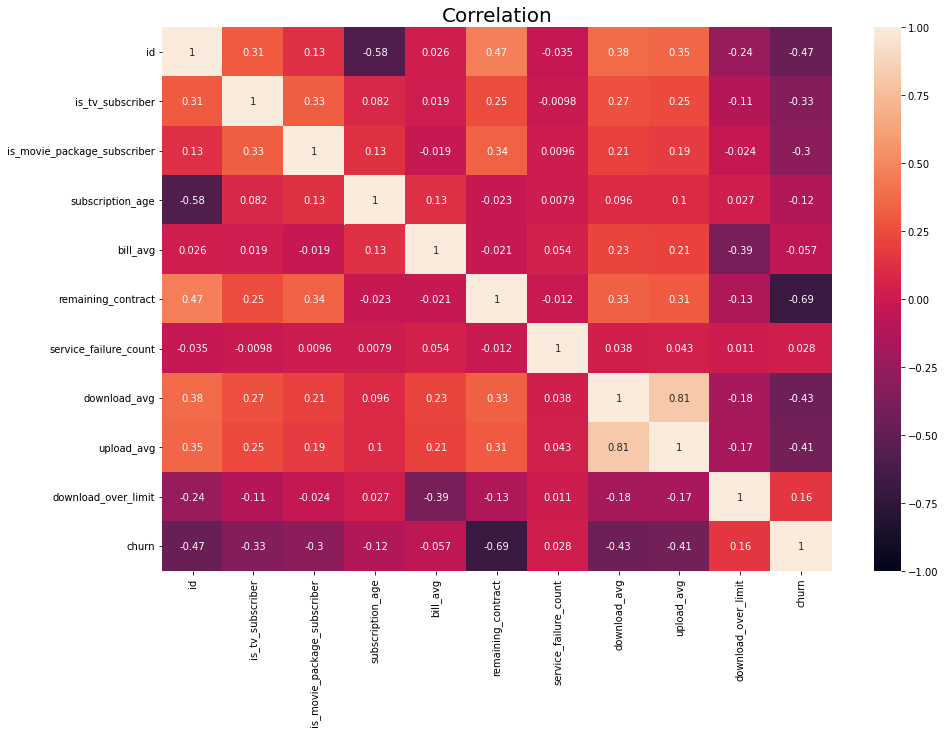

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation', fontsize = 20)
ax = sns.heatmap(correlation,vmin=-1,vmax=1,annot=True)
plt.show()

# Data Modeling

## Feature Selection

In [ ]:
df = new_df_clean.copy()

In [ ]:
df.columns

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'remaining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')

In [ ]:
df.isnull().mean()

id                             0.0
is_tv_subscriber               0.0
is_movie_package_subscriber    0.0
subscription_age               0.0
bill_avg                       0.0
remaining_contract             0.0
service_failure_count          0.0
download_avg                   0.0
upload_avg                     0.0
download_over_limit            0.0
churn                          0.0
dtype: float64

In [ ]:
x = df.iloc[:, [1,2,3,4,5,6,7,8,9]]
y = df.iloc[:, 10]

In [ ]:
x.shape

(62495, 9)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state = 41)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(49996, 9) (12499, 9) (49996,) (12499,)


In [ ]:
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

print(model.feature_importances_)

[0.05370983 0.03451006 0.0674944  0.07115015 0.55356668 0.01013403
 0.10729412 0.09429113 0.0078496 ]


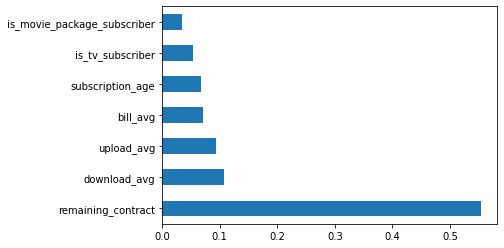

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [ ]:
x_train.columns

Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
       'bill_avg', 'remaining_contract', 'service_failure_count',
       'download_avg', 'upload_avg', 'download_over_limit'],
      dtype='object')

In [ ]:
x_train.drop(['service_failure_count',  'download_over_limit'], 
             axis = 1, inplace = True)

In [ ]:
x_test.drop(['service_failure_count','download_over_limit'], 
             axis = 1, inplace = True)

In [ ]:
x_train.shape

(49996, 7)

In [ ]:
x_train.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,download_avg,upload_avg
18541,1,0,0.35,19,0.01,0.0,0.0
10495,1,0,5.07,26,0.00,73.6,8.1
48912,1,1,2.21,12,0.50,31.7,4.3
2369,1,0,2.27,0,0.00,0.0,0.0
49499,1,0,1.12,22,0.00,15.8,0.9


In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

## Logistic Regression Modeling

In [ ]:
log_cls = LogisticRegression(random_state=41, max_iter=75)
log_cls.fit(x_train, y_train)

log_cls_pred = log_cls.predict(x_test)

In [ ]:
log_cls_acc = accuracy_score(y_test, log_cls_pred)
log_cls_acc

0.8747099767981439

In [ ]:
log_cls_prec = precision_score(y_test, log_cls_pred)
log_cls_prec

0.8719926778242678

In [ ]:
log_cls_rec = recall_score(y_test, log_cls_pred)
log_cls_rec

0.9191014332965821

## K-Nearest Neighbors Modeling

In [ ]:
kn_cls = KNeighborsClassifier(n_neighbors=10, metric= 'minkowski', p =2)
kn_cls.fit(x_train, y_train)

kn_cls_pred = kn_cls.predict(x_test)

In [ ]:
kn_cls_acc = accuracy_score(y_test, kn_cls_pred)
kn_cls_acc

0.9087126970157613

In [ ]:
kn_cls_prec = precision_score(y_test, kn_cls_pred)
kn_cls_prec

0.9331350049582093

In [ ]:
kn_cls_rec = recall_score(y_test, kn_cls_pred)
kn_cls_rec

0.907800441014333

## Decision Tree Modeling

In [ ]:
d_tree = DecisionTreeClassifier(criterion='gini')
d_tree.fit(x_train, y_train)

d_tree_pred = d_tree.predict(x_test)

In [ ]:
d_tree_acc = accuracy_score(y_test, d_tree_pred)
d_tree_acc

0.9163133050644051

In [ ]:
d_tree_prec = precision_score(y_test, d_tree_pred)
d_tree_prec

0.9316096747289407

In [ ]:
d_tree_rec = recall_score(y_test, d_tree_pred)
d_tree_rec

0.9236493936052922

## Support Vector Machine Modeling

In [ ]:
svc = SVC(kernel= 'sigmoid', random_state= 41)
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

In [ ]:
svc_acc = accuracy_score(y_test, svc_pred)
svc_acc

0.8070245619649572

In [ ]:
svc_prec = precision_score(y_test, svc_pred)
svc_prec

0.834807851810893

In [ ]:
svc_rec = recall_score(y_test, svc_pred)
svc_rec

0.8322767364939361

## Gaussian NB Modeling

In [ ]:
nb_log = GaussianNB()
nb_log.fit(x_train, y_train)

nb_pred = nb_log.predict(x_test)

In [ ]:
nb_acc = accuracy_score(y_test, nb_pred)
nb_acc

0.8524681974557965

In [ ]:
nb_prec = precision_score(y_test, nb_pred)
nb_prec

0.8936572592377073

In [ ]:
nb_rec = recall_score(y_test, nb_pred)
nb_rec

0.8466097023153253

## Model Selection

In [ ]:
performance = {'Accuracy':[log_cls_acc, kn_cls_acc, d_tree_acc, svc_acc, nb_acc],
              'Precision':[log_cls_prec, kn_cls_prec, d_tree_prec, svc_prec, nb_prec],
              'Recall': [log_cls_rec, kn_cls_rec, d_tree_rec, svc_rec, nb_rec]}

In [ ]:
performance_df = pd.DataFrame(data = performance, index= ['Logistic Regression', 'KNeighbors', 
                                                          'DecisionTree', 'SVC', 'GaussianNB'])
performance_df

,Accuracy,Precision,Recall
Logistic Regression,0.874710,0.871993,0.919101
KNeighbors,0.908713,0.933135,0.907800
DecisionTree,0.916313,0.931610,0.923649
SVC,0.807025,0.834808,0.832277
GaussianNB,0.852468,0.893657,0.846610


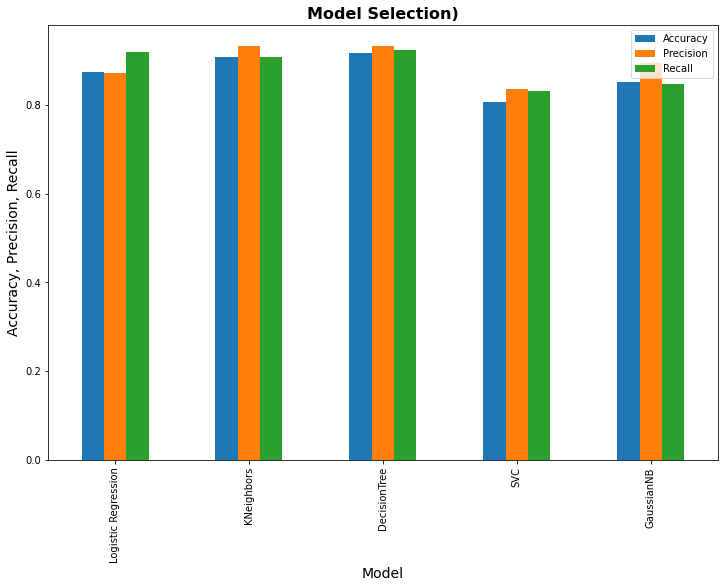

In [ ]:
performance_df.plot(kind="bar", figsize=(12,8))
plt.title('Model Selection)', fontdict= {'weight': 'bold',
        'size': 16})
plt.xlabel('Model', fontdict= {'size': 14})
plt.ylabel('Accuracy, Precision, Recall',fontdict= {'size': 14})
plt.show()

# Data Manipulation

## on Movie Package Subscriber

In [ ]:
df_man = new_df_clean.copy()
df_man

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [ ]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62495 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           62495 non-null  int64  
 1   is_tv_subscriber             62495 non-null  int64  
 2   is_movie_package_subscriber  62495 non-null  int64  
 3   subscription_age             62495 non-null  float64
 4   bill_avg                     62495 non-null  int64  
 5   remaining_contract           62495 non-null  float64
 6   service_failure_count        62495 non-null  int64  
 7   download_avg                 62495 non-null  float64
 8   upload_avg                   62495 non-null  float64
 9   download_over_limit          62495 non-null  int64  
 10  churn                        62495 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 7.7 MB


In [ ]:
val_movie = df_man["is_movie_package_subscriber"].value_counts()
val_movie

0    42636
1    19859
Name: is_movie_package_subscriber, dtype: int64

movie sub 0 > 1

In [ ]:
movie_sub_man = df_man['is_movie_package_subscriber']
movie_sub_man.replace(to_replace = 0, value = 1, inplace=True)
df_man

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,1,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,1,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,1,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,1,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,1,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,1,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,1,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,1,0.01,0,0.72,0,0.0,0.0,0,1


In [ ]:
x_man = df_man.iloc[:, [1,2,3,4,5,6,7,8,9]]
y_man = df_man.iloc[:, 10]
x_man.shape

(62495, 9)

In [ ]:
d_tree_man = DecisionTreeClassifier(criterion='gini')
d_tree_man.fit(x, y)

d_tree_man_pred = d_tree_man.predict(x_man)

confusion_matrix(y, d_tree_man_pred)

array([[24947,  1292],
       [  879, 35377]])

In [ ]:
acc_man1 = accuracy_score(y, d_tree_man_pred)
pred_man1 = precision_score(y, d_tree_man_pred)
rec_man1 = recall_score(y, d_tree_man_pred)

print('accuracy',acc_man1)
print('precision',pred_man1)
print('recall',rec_man1)

accuracy 0.9652612208976719
precision 0.9647658785350023
recall 0.9757557369814651


 from data train, accuracy 0.9152, precision 0.92946001367054, recall 0.9259158382132643

From data manipulation, accuracy 0.9637896825396826, precision 0.9637147378185191, recall 0.9742670380891966

## on Download Average

In [ ]:
df_man2 = new_df_clean.copy()
df_man2

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [ ]:
val_movie = df_man2["download_avg"].value_counts()
val_movie

0.0      10575
0.1        147
0.2        142
2.1        128
0.8        125
         ...  
120.4        2
134.5        1
120.1        1
134.4        1
128.5        1
Name: download_avg, Length: 1344, dtype: int64

In [ ]:
download_avg_man = df_man2['download_avg']
download_avg_man.replace(to_replace = 0, value = download_avg_man.mean(), inplace=True)
df_man2

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.40000,2.3,0,0
1,18,0,0,8.22,0,0.00,0,31.05859,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.70000,0.9,0,1
3,27,0,0,6.87,21,0.00,1,31.05859,0.0,0,1
4,34,0,0,6.39,0,0.00,0,31.05859,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,31.05859,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.80000,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.50000,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,31.05859,0.0,0,1


In [ ]:
x_man2 = df_man2.iloc[:, [1,2,3,4,5,6,7,8,9]]
y_man2 = df_man2.iloc[:, 10]
x_man2.shape

(62495, 9)

In [ ]:
d_tree_man2 = DecisionTreeClassifier(criterion='gini')
d_tree_man2.fit(x, y)

d_tree_man2_pred = d_tree_man2.predict(x_man2)

confusion_matrix(y, d_tree_man2_pred)

array([[26232,     7],
       [  774, 35482]])

In [ ]:
acc_man2 = accuracy_score(y, d_tree_man2_pred)
pred_man2 = precision_score(y, d_tree_man2_pred)
rec_man2 = recall_score(y, d_tree_man2_pred)

print('accuracy',acc_man2)
print('precision',pred_man2)
print('recall',rec_man2)

accuracy 0.9875030002400192
precision 0.9998027557834822
recall 0.9786518093556928


## on Movie Package Subsriber and Download Average

In [ ]:
df_man3 = new_df_clean.copy()
df_man3

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [ ]:
movie_man = df_man3['is_movie_package_subscriber']
movie_man.replace(to_replace = 0, value = 1, inplace=True)
download_avg_man2 = df_man3['download_avg']
download_avg_man2.replace(to_replace = 0, value = download_avg_man2.mean(), inplace=True)
df_man3

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,1,11.95,25,0.14,0,8.40000,2.3,0,0
1,18,0,1,8.22,0,0.00,0,31.05859,0.0,0,1
2,23,1,1,8.91,16,0.00,0,13.70000,0.9,0,1
3,27,0,1,6.87,21,0.00,1,31.05859,0.0,0,1
4,34,0,1,6.39,0,0.00,0,31.05859,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,31.05859,0.0,0,1
72270,1689676,1,1,0.06,1,1.63,0,0.80000,0.0,0,1
72271,1689679,1,1,0.02,0,2.19,0,1.50000,0.2,0,1
72272,1689733,0,1,0.01,0,0.72,0,31.05859,0.0,0,1


In [ ]:
x_man3 = df_man3.iloc[:, [1,2,3,4,5,6,7,8,9]]
y_man3 = df_man3.iloc[:, 10]
x_man3.shape

(62495, 9)

In [ ]:
d_tree_man3 = DecisionTreeClassifier(criterion='gini')
d_tree_man3.fit(x, y)

d_tree_man3_pred = d_tree_man3.predict(x_man3)

confusion_matrix(y, d_tree_man3_pred)

array([[24847,  1392],
       [ 2356, 33900]])

In [ ]:
acc_man3 = accuracy_score(y, d_tree_man3_pred)
pred_man3 = precision_score(y, d_tree_man3_pred)
rec_man3 = recall_score(y, d_tree_man3_pred)

print('accuracy',acc_man3)
print('precision',pred_man3)
print('recall',rec_man3)

accuracy 0.9400272021761741
precision 0.9605576334580075
recall 0.9350176522506619


## on Download Average and Upload Average

In [ ]:
df_man4 = new_df_clean.copy()
df_man4

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [ ]:
download_avg_man3 = df_man4['download_avg']
download_avg_man3.replace(to_replace = 0, value = download_avg_man3.mean(), inplace=True)
upload_avg_man = df_man4['upload_avg']
upload_avg_man.replace(to_replace = 0, value = upload_avg_man.mean(), inplace=True)
df_man4

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.40000,2.300000,0,0
1,18,0,0,8.22,0,0.00,0,31.05859,2.375537,0,1
2,23,1,0,8.91,16,0.00,0,13.70000,0.900000,0,1
3,27,0,0,6.87,21,0.00,1,31.05859,2.375537,0,1
4,34,0,0,6.39,0,0.00,0,31.05859,2.375537,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,31.05859,2.375537,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.80000,2.375537,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.50000,0.200000,0,1
72272,1689733,0,0,0.01,0,0.72,0,31.05859,2.375537,0,1


In [ ]:
x_man4 = df_man4.iloc[:, [1,2,3,4,5,6,7,8,9]]
y_man4 = df_man4.iloc[:, 10]
x_man4.shape

(62495, 9)

In [ ]:
d_tree_man4 = DecisionTreeClassifier(criterion='gini')
d_tree_man4.fit(x, y)

d_tree_man4_pred = d_tree_man4.predict(x_man4)

confusion_matrix(y, d_tree_man4_pred)

array([[26227,    12],
       [ 1386, 34870]])

In [ ]:
acc_man4 = accuracy_score(y, d_tree_man4_pred)
pred_man4 = precision_score(y, d_tree_man4_pred)
rec_man4 = recall_score(y, d_tree_man4_pred)

print('accuracy',acc_man4)
print('precision',pred_man4)
print('recall',rec_man4)

accuracy 0.9776302104168334
precision 0.9996559830284961
recall 0.9617718446601942


## on Remaining Contract

In [ ]:
df_man5 = new_df_clean.copy()
df_man5

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [ ]:
df_man5['remaining_contract'].min()

0.0

In [ ]:
contract_man = df_man5['download_avg']
contract_man.replace(to_replace = 0, value = contract_man.mean(), inplace=True)
df_man5

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.40000,2.3,0,0
1,18,0,0,8.22,0,0.00,0,31.05859,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.70000,0.9,0,1
3,27,0,0,6.87,21,0.00,1,31.05859,0.0,0,1
4,34,0,0,6.39,0,0.00,0,31.05859,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,31.05859,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.80000,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.50000,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,31.05859,0.0,0,1


In [ ]:
x_man5 = df_man5.iloc[:, [1,2,3,4,5,6,7,8,9]]
y_man5 = df_man5.iloc[:, 10]
x_man5.shape

(62495, 9)

In [ ]:
d_tree_man5 = DecisionTreeClassifier(criterion='gini')
d_tree_man5.fit(x, y)

d_tree_man5_pred = d_tree_man5.predict(x_man5)

confusion_matrix(y, d_tree_man5_pred)

array([[26232,     7],
       [  731, 35525]])

In [ ]:
acc_man5 = accuracy_score(y, d_tree_man5_pred)
pred_man5 = precision_score(y, d_tree_man5_pred)
rec_man5 = recall_score(y, d_tree_man5_pred)

print('accuracy',acc_man5)
print('precision',pred_man5)
print('recall',rec_man5)

accuracy 0.9881910552844227
precision 0.9998029944838456
recall 0.9798378199470432


## Compare Data Model with Data Manipulation Test

In [ ]:
performance_test = {'Accuracy':[d_tree_acc, acc_man1, acc_man2, acc_man3, acc_man4, acc_man5],
              'Precision':[d_tree_prec, pred_man1, pred_man2, pred_man3, pred_man4, pred_man5],
              'Recall': [d_tree_rec, rec_man1, rec_man2, rec_man3, rec_man4, rec_man5]}

df_test = pd.DataFrame(data = performance_test, index= ['Data Model', 'on Movie Package Subscriber', 
                                                          'on Download Average', 'on Movie Package Subscriber and Download Average', 'on Download Average and Upload Average',
                                                        'on Remaining Contract'])
df_test

,Accuracy,Precision,Recall
Data Model,0.916313,0.931610,0.923649
on Movie Package Subscriber,0.965261,0.964766,0.975756
on Download Average,0.987503,0.999803,0.978652
on Movie Package Subscriber and Download Average,0.940027,0.960558,0.935018
on Download Average and Upload Average,0.977630,0.999656,0.961772
on Remaining Contract,0.988191,0.999803,0.979838


# Export to CSV

In [ ]:
#new_df_clean.to_csv('dataset.csv')

In [ ]:
#performance_df.to_csv('perform.csv')

In [ ]:
#df_test.to_csv('datacompare.csv')